In [1]:
!pip install wordcloud

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [3]:
path = '/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv'
df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
5,5,"every break, you must be nervous, like somethi...",Anxiety
6,6,"I feel scared, anxious, what can I do? And may...",Anxiety
7,7,Have you ever felt nervous but didn't know why?,Anxiety
8,8,"I haven't slept well for 2 days, it's like I'm...",Anxiety
9,9,"I'm really worried, I want to cry.",Anxiety


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
df = df.dropna()

# Vizualize data

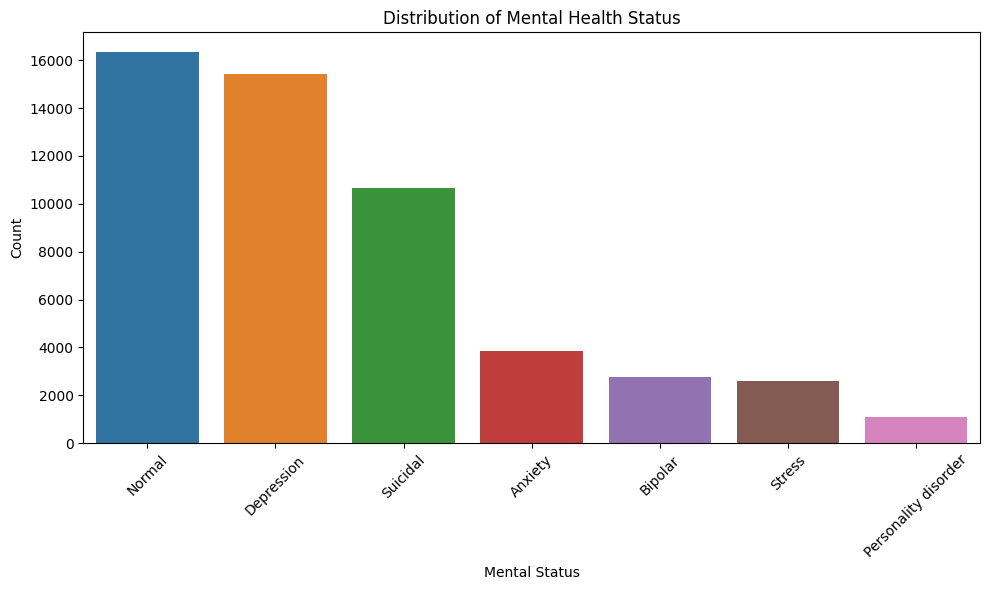

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x='status', order=df['status'].value_counts().index)
plt.title('Distribution of Mental Health Status')
plt.xlabel('Mental Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


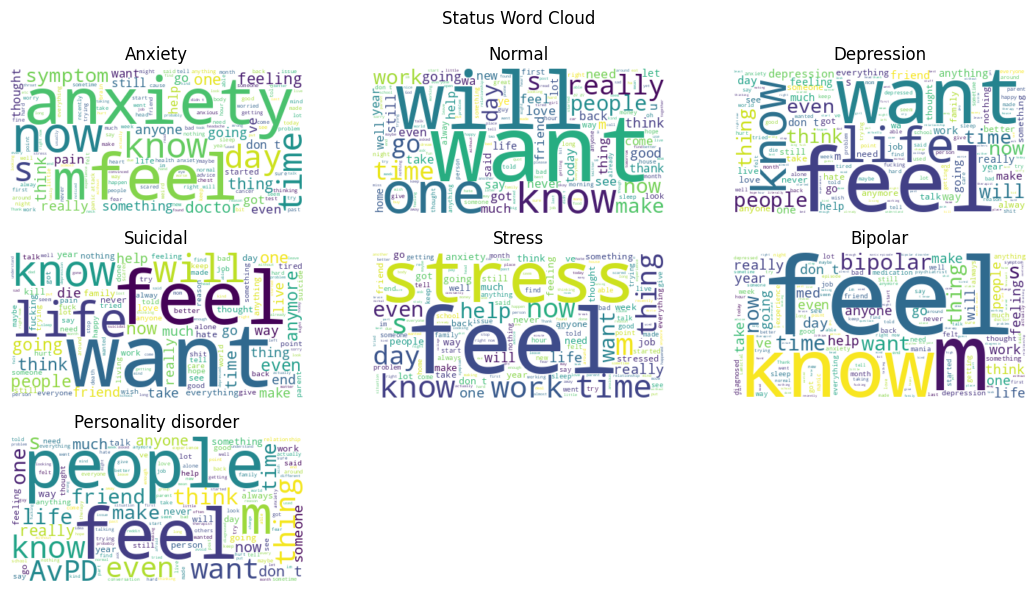

In [7]:
status = df.status.unique()

n = len(status)

plt.figure(figsize = (11, 6))
for i in range(n):
    text = ''.join(df[df.status == status[i]].statement)
    cloud = WordCloud(background_color = 'white').generate(text)
    plt.subplot(3, 3, i+1)
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.title(status[i])
    plt.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.7)

plt.suptitle('Status Word Cloud')
plt.tight_layout()
plt.show()

# Preprocess Data

In [8]:
X =  df['statement']
y = df['status']

In [9]:
max_features = 5000

c_vectorizer = CountVectorizer(max_features = max_features, stop_words = 'english').fit(X)
label_encoder = LabelEncoder().fit(y)

X = c_vectorizer.transform(X)
y = label_encoder.transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 25)

# Create model

## Using Random Forest Classifier

In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
y_pred_rf = rf_model.predict(x_test)
y_train_pred_rf = rf_model.predict(x_train)

test_score_rf = accuracy_score(y_test, y_pred_rf)
train_score_rf = accuracy_score(y_train, y_train_pred_rf)

print(f'Test Score: {test_score_rf}')
print(f'Train Score: {train_score_rf}')



Test Score: 0.7058795615242253
Train Score: 0.9982915717539863


## Using Extra Trees Classifier

In [12]:
ext_model = ExtraTreesClassifier()
ext_model.fit(x_train, y_train) 

ExtraTreesClassifier()

In [13]:
y_pred_ext = ext_model.predict(x_test)
y_train_pred_ext = ext_model.predict(x_train)

test_score_ext = accuracy_score(y_test,y_pred_ext)
train_score_ext = accuracy_score(y_train,y_train_pred_ext)

print(f'Test Score: {test_score_ext}')
print(f'Train Score: {train_score_ext}')

Test Score: 0.6999478005030133
Train Score: 0.9982915717539863
